In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [93]:
from sklearn.metrics import confusion_matrix, roc_curve

In [3]:
import string

In [4]:
def logistic_function(features, coefficients):
    score = bp.dot(featres, coefficies)
    result = (1+np.e**(score))**(-1)
    
    return result

In [5]:
os.getcwd()

'/home/shrikrishna/Desktop/Coursera Machine Learning/Machine Learning: Classification/Week 2 Learning Linear Classifiers'

In [6]:
#Load the products data
products = pd.read_csv(os.getcwd() + '/amazon_baby_subset.csv/amazon_baby_subset.csv')

In [7]:
products.isna().sum()

name          90
review       241
rating         0
sentiment      0
dtype: int64

In [8]:
#Fill the missing values with blanks
products.review = products.review.fillna("")

In [9]:
products.isna().sum()

name         90
review        0
rating        0
sentiment     0
dtype: int64

##  Remove Punctuation

In [10]:
def remove_punctuation(text):
    return "".join(ele for ele in text if(ele not in string.punctuation))

In [11]:
sample_string = "I am a powerful soul, merged with God in the Ocean of Power.\
Oh! I see?"
list(map(remove_punctuation, [sample_string]))

['I am a powerful soul merged with God in the Ocean of PowerOh I see']

In [12]:
#Remove punctuation from each review
#Create a new column review_clean
products['review_clean'] = products['review'].apply(remove_punctuation)

In [13]:
products[['review', 'review_clean']]

,review,review_clean
0,All of my kids have cried non-stop when I trie...,All of my kids have cried nonstop when I tried...
1,We wanted to get something to keep track of ou...,We wanted to get something to keep track of ou...
2,My daughter had her 1st baby over a year ago. ...,My daughter had her 1st baby over a year ago S...
3,"One of baby's first and favorite books, and it...",One of babys first and favorite books and it i...
4,Very cute interactive book! My son loves this ...,Very cute interactive book My son loves this b...
5,"Beautiful book, I love it to record cherished ...",Beautiful book I love it to record cherished t...
6,"Try this out for a spring project !Easy ,fun a...",Try this out for a spring project Easy fun and...
7,very nice Divine Mercy Pendant of Jesus now on...,very nice Divine Mercy Pendant of Jesus now on...
8,We bought the pins as my 6 year old Autistic s...,We bought the pins as my 6 year old Autistic s...
9,It has been many years since we needed diaper ...,It has been many years since we needed diaper ...


### Count Occurance of Important Words in the Review

In [14]:
important_words = pd.read_json(os.getcwd() + '//important_words.json//important_words.json')

In [15]:
important_words.head()

,0
0,baby
1,one
2,great
3,love
4,use


In [16]:
len(important_words[0])

193

In [17]:
for word in important_words[0]:
    #Store the count of the word for each review
    products[word] = products.review_clean.apply(lambda s:s.split().count(word))

In [18]:
products = products.reset_index()

In [19]:
products = products.set_index('index')

In [20]:
products.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
index,,,,,,,,,,,,,,,,,,,,,
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


### Training and Validation

In [21]:
#Obtain the training and validation indices
train_indices = pd.read_json(os.getcwd() + 
                             "/module-4-assignment-train-idx.json/module-4-assignment-train-idx.json")
validation_indices = pd.read_json(os.getcwd() + 
                             "/module-4-assignment-validation-idx.json/module-4-assignment-validation-idx.json")

In [22]:
validation_indices[0]

0            2
1            9
2           23
3           26
4           27
5           30
6           32
7           41
8           50
9           63
10          67
11          77
12          79
13          84
14          91
15         100
16         111
17         112
18         115
19         121
20         122
21         123
22         128
23         130
24         141
25         143
26         154
27         159
28         171
29         181
         ...  
10681    52927
10682    52929
10683    52934
10684    52936
10685    52944
10686    52946
10687    52949
10688    52952
10689    52954
10690    52955
10691    52962
10692    52968
10693    52978
10694    52981
10695    52992
10696    52998
10697    53000
10698    53001
10699    53006
10700    53009
10701    53011
10702    53013
10703    53019
10704    53020
10705    53041
10706    53053
10707    53059
10708    53063
10709    53068
10710    53071
Name: 0, Length: 10711, dtype: int64

In [23]:
train_indices[0]

0            0
1            1
2            3
3            4
4            5
5            6
6            7
7            8
8           10
9           11
10          12
11          13
12          14
13          15
14          16
15          17
16          18
17          19
18          20
19          21
20          22
21          24
22          25
23          28
24          29
25          31
26          33
27          34
28          35
29          36
         ...  
42331    53036
42332    53037
42333    53038
42334    53039
42335    53040
42336    53042
42337    53043
42338    53044
42339    53045
42340    53046
42341    53047
42342    53048
42343    53049
42344    53050
42345    53051
42346    53052
42347    53054
42348    53055
42349    53056
42350    53057
42351    53058
42352    53060
42353    53061
42354    53062
42355    53064
42356    53065
42357    53066
42358    53067
42359    53069
42360    53070
Name: 0, Length: 42361, dtype: int64

In [24]:
train_indices, validation_indices = list(map(list, [train_indices[0],
                                validation_indices[0]]))

In [25]:
train_indices

[0,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 28,
 29,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 78,
 80,
 81,
 82,
 83,
 85,
 86,
 87,
 88,
 89,
 90,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 113,
 114,
 116,
 117,
 118,
 119,
 120,
 124,
 125,
 126,
 127,
 129,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 142,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 212,
 214,
 215,
 

In [26]:
train_data, validation_data = list(map(lambda x:products.iloc[x,:],
                                 [train_indices, validation_indices]))

In [27]:
train_data.shape, validation_data.shape

((42361, 198), (10711, 198))

In [28]:
train_data.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
index,,,,,,,,,,,,,,,,,,,,,
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Our Baby Girl Memory Book,"Beautiful book, I love it to record cherished ...",5,1,Beautiful book I love it to record cherished t...,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
validation_data.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
index,,,,,,,,,,,,,,,,,,,,,
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Cloth Diaper Pins Stainless Steel Traditional ...,It has been many years since we needed diaper ...,5,1,It has been many years since we needed diaper ...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Fisher Price Nesting Action Vehicles,For well over a year my son has enjoyed stacki...,5,1,For well over a year my son has enjoyed stacki...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,Sassy Who Loves Baby? Photo Album Book with te...,I bought this for a new granddaughter. I will...,5,1,I bought this for a new granddaughter I will ...,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
27,Earlyears: Earl E. Bird with Teething Rings,We received an Earl E. Bird as a gift when we ...,5,1,We received an Earl E Bird as a gift when we h...,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Get the Feature Matrix and Sentiment Matrix

In [30]:
def get_numpy_data(data, features, sentiment):
    #the parameter 'features' is a list
    data['constant'] = 1
    
    features = ['constant'] + features
    
    feature_matrix, sentiment = np.array(data[features]), np.array(data[sentiment])
    
    return (feature_matrix, sentiment)

In [31]:
'sentiment' in train_data.columns and 'sentiment' in validation_data.columns

True

In [32]:
important_words[0]

0            baby
1             one
2           great
3            love
4             use
5           would
6            like
7            easy
8          little
9            seat
10            old
11           well
12            get
13           also
14         really
15            son
16           time
17         bought
18        product
19           good
20       daughter
21           much
22          loves
23       stroller
24            put
25         months
26            car
27          still
28           back
29           used
          ...    
163       started
164      anything
165          last
166       company
167          come
168      returned
169         maybe
170          took
171         broke
172         makes
173          stay
174       instead
175          idea
176          head
177          said
178          less
179          went
180       working
181          high
182          unit
183         seems
184       picture
185    completely
186          wish
187       

In [33]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, 
                                                       important_words[0].tolist(),
                                                       'sentiment')
feature_matrix_validate, sentiment_validate = get_numpy_data(validation_data,
                                                             important_words[0].tolist(),
                                                             'sentiment')

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Building on logistic regression with no L2 penalty assignment


In [34]:
#Logistic Function - Link Function
def predict_probability(feature_matrix, weights):
    score = np.dot(feature_matrix, weights)
    
    return (1 + np.e**((-1)*score))**(-1)

In [35]:
def feature_derivative_with_L2(feature, error, coefficient, l2_penalty,
                               feature_is_constant):
    #Calculate the derivative
    derivative = np.dot(feature, error)
    
    if not feature_is_constant:
        #Substract l2 penalty term
        derivative -= 2*l2_penalty*coefficient
    
    return derivative

## Quiz Question: In the code above, was the intercept term regularized? 

In [36]:
print("No")

No


In [37]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients,
                                   l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - \
                l2_penalty*np.sum(coefficients[1:]**2)
    
    return lp

## Quiz question: Does the term with L2 regularization increase or decrease ℓℓ(w)?

In [38]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients,
                                step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        ## YOUR CODE HERE
        predictions = predict_probability(feature_matrix, coefficients)
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in range(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]. Save it in a variable called derivative
            ## YOUR CODE HERE
            derivative = feature_derivative_with_L2(feature_matrix[:,j],
                                                    errors, coefficients[j],
                                                    l2_penalty,
                                                    is_intercept)
            
            
            # add the step size times the derivative to the current coefficient
            ## YOUR CODE HERE (Gradient Ascend)
            coefficients[j] += step_size * derivative
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print ('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    return coefficients

In [39]:
np.zeros(194).shape

(194,)

In [40]:
np.unique(np.zeros(194))

array([0.])

## Obtain Coefficients for Different Values of Regularization term

In [41]:
penalty_values = [0, 4, 10, 1e2, 1e3, 1e5]
def get_coefficients(feature_matrix, sentiment):
    
    #A 194 dimensions array with all zeros
    initial_coefficients = np.zeros(194)
    step_size = 5e-6
    max_iter = 501

    coefficient_list = []
    for l2_penalty in penalty_values:
        #Training set
        coeff = logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients,
                            step_size, l2_penalty, max_iter)
    
        coefficient_list.append(coeff)
    
    return (coefficient_list)


In [42]:
# feature_matrix = feature_matrix_train
# sentiment = sentiment_train
coefficient_list_train = get_coefficients(feature_matrix_train,
                                         sentiment_train)

coefficient_list_validate = get_coefficients(feature_matrix_validate,
                                            sentiment_validate)


iteration   0: log likelihood of observed labels = -29179.39138303
iteration   1: log likelihood of observed labels = -29003.71259047
iteration   2: log likelihood of observed labels = -28834.66187288
iteration   3: log likelihood of observed labels = -28671.70781507
iteration   4: log likelihood of observed labels = -28514.43078198
iteration   5: log likelihood of observed labels = -28362.48344665
iteration   6: log likelihood of observed labels = -28215.56713122
iteration   7: log likelihood of observed labels = -28073.41743783
iteration   8: log likelihood of observed labels = -27935.79536396
iteration   9: log likelihood of observed labels = -27802.48168669
iteration  10: log likelihood of observed labels = -27673.27331484
iteration  11: log likelihood of observed labels = -27547.98083656
iteration  12: log likelihood of observed labels = -27426.42679977
iteration  13: log likelihood of observed labels = -27308.44444728
iteration  14: log likelihood of observed labels = -27193.8767

iteration   7: log likelihood of observed labels = -28162.56976044
iteration   8: log likelihood of observed labels = -28046.29387744
iteration   9: log likelihood of observed labels = -27935.93902900
iteration  10: log likelihood of observed labels = -27831.15045502
iteration  11: log likelihood of observed labels = -27731.59955260
iteration  12: log likelihood of observed labels = -27636.98108219
iteration  13: log likelihood of observed labels = -27547.01092670
iteration  14: log likelihood of observed labels = -27461.42422295
iteration  15: log likelihood of observed labels = -27379.97375625
iteration  20: log likelihood of observed labels = -27027.18208317
iteration  30: log likelihood of observed labels = -26527.22737267
iteration  40: log likelihood of observed labels = -26206.59048765
iteration  50: log likelihood of observed labels = -25995.96903148
iteration  60: log likelihood of observed labels = -25854.95710284
iteration  70: log likelihood of observed labels = -25759.0810

iteration  30: log likelihood of observed labels = -7106.17639679
iteration  40: log likelihood of observed labels = -7020.73798002
iteration  50: log likelihood of observed labels = -6941.89321539
iteration  60: log likelihood of observed labels = -6868.90938778
iteration  70: log likelihood of observed labels = -6801.15968610
iteration  80: log likelihood of observed labels = -6738.10175218
iteration  90: log likelihood of observed labels = -6679.26364886
iteration 100: log likelihood of observed labels = -6624.23312890
iteration 200: log likelihood of observed labels = -6221.33265474
iteration 300: log likelihood of observed labels = -5974.95129883
iteration 400: log likelihood of observed labels = -5807.81758692
iteration 500: log likelihood of observed labels = -5686.72507970
iteration   0: log likelihood of observed labels = -7412.45353334
iteration   1: log likelihood of observed labels = -7400.76083546
iteration   2: log likelihood of observed labels = -7389.21673706
iteration 

In [43]:
len(['Intercept'] + important_words[0])

193

In [44]:
coefficient_0 = coefficient_list_train[0]
coefficient_1 = coefficient_list_train[1]
coefficient_2 = coefficient_list_train[2]
coefficient_3 = coefficient_list_train[3]
coefficient_4 = coefficient_list_train[4]
coefficient_5 = coefficient_list_train[5]

In [45]:
column_list = ['Important Words', 'Coefficient_0', 
               'Coefficient_4', 'Coefficient_10',
               'Coefficient_100', 'Coefficient_1000',
               'Coefficient_100000']
imp_words =list(important_words[0])
results = pd.DataFrame({'Important Words': ['Intercept'] + imp_words,
                        'Coefficient_0': coefficient_0,
                        'Coefficient_4': coefficient_1,
                        'Coefficient_10': coefficient_2,
                        'Coefficient_100': coefficient_3,
                        'Coefficient_1000': coefficient_4,
                        'Coefficient_100000': coefficient_5},
                       columns = column_list)

In [46]:
results.tail(10)

,Important Words,Coefficient_0,Coefficient_4,Coefficient_10,Coefficient_100,Coefficient_1000,Coefficient_100000
184,seems,0.058308,0.057905,0.057312,0.049753,0.022875,0.000329
185,picture,-0.196906,-0.195273,-0.192866,-0.162143,-0.061171,-0.001151
186,completely,-0.277845,-0.275461,-0.271947,-0.227098,-0.081775,-0.001421
187,wish,0.173191,0.171640,0.169352,0.140022,0.044374,0.000468
188,buying,-0.132197,-0.131083,-0.129441,-0.108471,-0.040331,-0.000792
189,babies,0.052494,0.052130,0.051594,0.044805,0.021026,0.000365
190,won,0.004960,0.004907,0.004830,0.003848,0.001084,0.000017
191,tub,-0.166745,-0.165367,-0.163338,-0.137693,-0.054778,-0.000936
192,almost,-0.031916,-0.031621,-0.031186,-0.025604,-0.007361,-0.000125
193,either,-0.228852,-0.226793,-0.223758,-0.184986,-0.061138,-0.000980


In [47]:
os.getcwd()

'/home/shrikrishna/Desktop/Coursera Machine Learning/Machine Learning: Classification/Week 2 Learning Linear Classifiers'

In [48]:
#Write the results df to a file
results.to_csv(os.getcwd() + '/coefficients.csv')

In [49]:
#Coefficient_0
sorted_results = results.sort_values(by='Coefficient_0', ascending=False)

#Positive Words
positive_words = list(sorted_results['Important Words'])[:5]

#Negative Words
negative_words = list(sorted_results['Important Words'])[-5:]

## Quiz Question. Which of the following is not listed in either positive_words or negative_words?

In [50]:
positive_words

['love', 'loves', 'easy', 'perfect', 'great']

In [51]:
negative_words

['returned', 'waste', 'return', 'money', 'disappointed']

## 14. Let us observe the effect of increasing L2 penalty on the 10 words just selected. Make a plot of the coefficients for the 10 words over the different values of L2 penalty.

In [52]:

def get_data():
    #Join the to lists
    words = positive_words + negative_words
    
    #create an empty data frame
    result_df = pd.DataFrame(columns=results.columns)
    
    #Extract the data for each word
    for word in words:
        result_df = pd.concat([result_df,
                               results.loc[results['Important Words']==word, :]])
    return result_df

In [53]:
result_df = get_data()

In [54]:
result_df

,Important Words,Coefficient_0,Coefficient_4,Coefficient_10,Coefficient_100,Coefficient_1000,Coefficient_100000
4,love,1.058554,1.050856,1.039529,0.896644,0.418354,0.009042
23,loves,1.052484,1.043903,1.031265,0.870794,0.345870,0.006150
8,easy,0.984559,0.977600,0.967362,0.838245,0.401904,0.008808
34,perfect,0.835693,0.828555,0.818038,0.684143,0.250614,0.003989
3,great,0.801625,0.796897,0.789935,0.701425,0.376012,0.008950
169,returned,-0.572707,-0.567518,-0.559870,-0.462056,-0.150021,-0.002225
113,waste,-0.617809,-0.612475,-0.604620,-0.505189,-0.190631,-0.003345
114,return,-0.742085,-0.735502,-0.725807,-0.602646,-0.215199,-0.003730
97,money,-0.768793,-0.762734,-0.753818,-0.641406,-0.275883,-0.005487
106,disappointed,-0.955437,-0.946980,-0.934518,-0.775625,-0.266095,-0.004013


In [59]:
result_df.to_csv("selected_10_words.csv")

In [58]:
penalty_values = [0, 4, 10, 1e2, 1e3, 1e5]

In [60]:
import timeit

In [67]:
timeit.time.time()

1560306146.073857

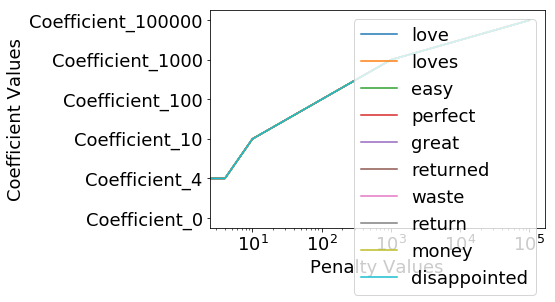

In [89]:

X = penalty_values
cols = result_df.columns.tolist()
words = result_df['Important Words']
for word in words:
    y = result_df.loc[result_df['Important Words']==word, cols[1:]]
    y = list(y)
    plt.plot(X, y)
    plt.xlabel("Penalty Values")
    plt.xscale('log')
    plt.ylabel("Coefficient Values")
plt.legend(words)
    #plt.show()
    #timeit.time.sleep(15)

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


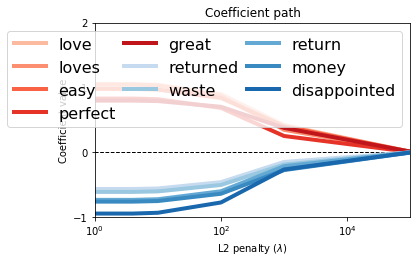

In [88]:
def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table[table['Important Words'].isin(positive_words)]
    table_negative_words = table[table['Important Words'].isin(negative_words)]
    del table_positive_words['Important Words']
    del table_negative_words['Important Words']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].as_matrix().flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].as_matrix().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()


make_coefficient_plot(result_df, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])

### Quiz Question: (True/False) All coefficients consistently get smaller in size as L2 penalty is increased.

In [90]:
print(True)

True


### Quiz Question: (True/False) Relative order of coefficients is preserved as L2 penalty is increased. (If word 'cat' was more positive than word 'dog', then it remains to be so as L2 penalty is increased.)

In [91]:
print(True)

True


### Quiz question: Which model (L2 = 0, 4, 10, 100, 1e3, 1e5) has the highest accuracy on the training data?

In [98]:
def evaluate(feature_matrix, penalty, coefficients, y_true):
    #Predict on training data
    y_pred_proba = predict_probability(feature_matrix,
                                       coefficients)
    y_pred = []
    for prob in y_pred_proba:
        if(prob>=0.5):
            y_pred.append(+1)
        else:
            y_pred.append(-1)
    
    #Evaluate
    CM = confusion_matrix(y_true, y_pred)
    accuracy = sum(CM.diagonal())/CM.sum()
    return accuracy

In [97]:
feature_matrix_train.shape

(42361, 194)

In [ ]:
feature_matrix_train = 

In [101]:
len(coefficient_list_train[0])

194

In [102]:
accuracy_train = [evaluate(feature_matrix_train, penalty_values[i],
                           coefficient_list_train[i], sentiment_train) \
                 for i in range(len(penalty_values))]

In [103]:
accuracy_train

[0.7851561577866434,
 0.7851089445480512,
 0.7849909114515711,
 0.7839758268218409,
 0.7758551497839994,
 0.6803663747314747]

### Quiz question: Which model (L2 = 0, 4, 10, 100, 1e3, 1e5) has the highest accuracy on the validation data?

In [104]:
accuracy_validate = [evaluate(feature_matrix_validate, penalty_values[i],
                           coefficient_list_validate[i], sentiment_validate) \
                 for i in range(len(penalty_values))]

In [105]:
accuracy_validate

[0.7735038745215199,
 0.7733171505928484,
 0.7732237886285127,
 0.7716366352348053,
 0.7630473345159182,
 0.5201195033143498]

### Quiz question: Does the highest accuracy on the training data imply that the model is the best one?

In [106]:
print("No")

No
